In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('calorieburnt.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [32]:
df.shape

(15000, 9)

In [33]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [35]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [36]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

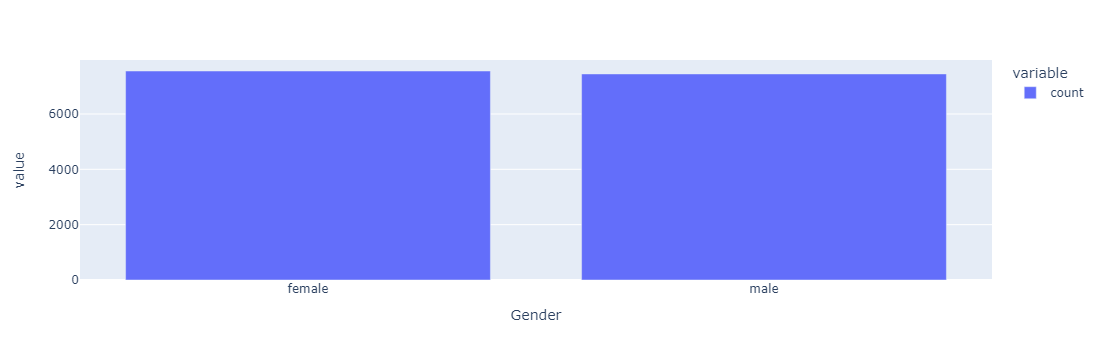

<Figure size 500x500 with 0 Axes>

In [37]:
import plotly.express as px
plt.figure(figsize=(5,5))
px.bar(df['Gender'].value_counts(),width=500,height=300)

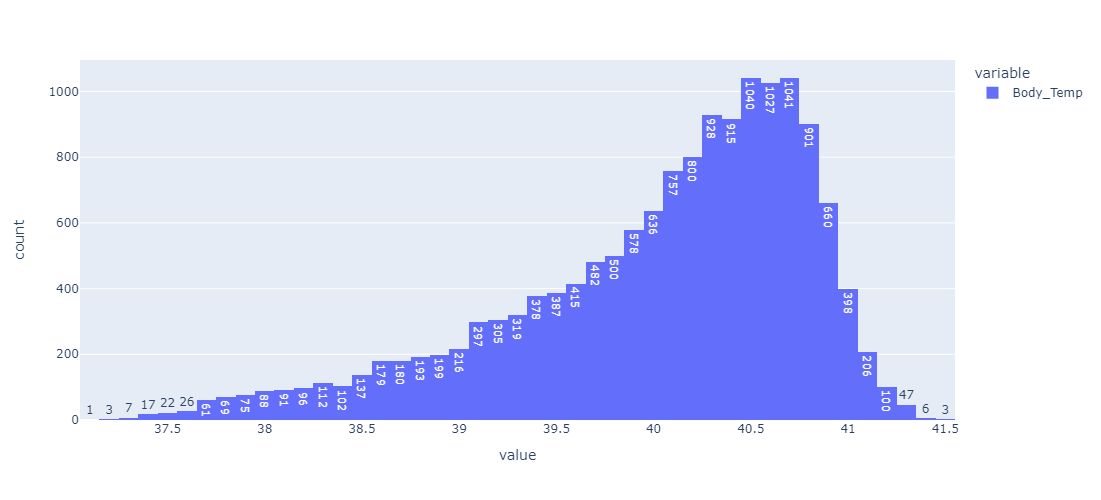

In [38]:
px.histogram(df['Age'],width=800,height=500,text_auto=True)
px.histogram(df['Height'],width=800,height=500,text_auto=True)
px.histogram(df['Weight'],width=800,height=500,text_auto=True)
px.histogram(df['Duration'],width=800,height=500,text_auto=True)
px.histogram(df['Heart_Rate'],width=800,height=500,text_auto=True)
px.histogram(df['Body_Temp'],width=800,height=500,text_auto=True)

In [39]:
df.iloc[:,2:]

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190,94,29,105,40.8,231
1,20,166,60,14,94,40.3,66
2,69,179,79,5,88,38.7,26
3,34,179,71,13,100,40.5,71
4,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...
14995,20,193,86,11,92,40.4,45
14996,27,165,65,6,85,39.2,23
14997,43,159,58,16,90,40.1,75
14998,78,193,97,2,84,38.3,11


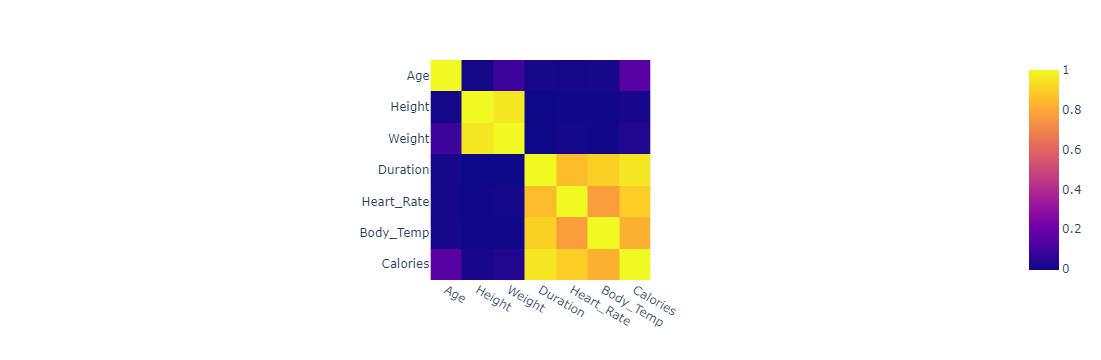

In [40]:
px.imshow(df.iloc[:,2:].corr())

In [41]:
df.replace({'Gender':{'male':1,'female':0}},inplace=True)

In [42]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,1,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35


In [43]:
X = df.drop(columns=['Calories','User_ID'])
y = df['Calories']

In [44]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190,94,29,105,40.8
1,0,20,166,60,14,94,40.3
2,1,69,179,79,5,88,38.7
3,0,34,179,71,13,100,40.5
4,0,27,154,58,10,81,39.8


In [45]:
y.head()

0    231
1     66
2     26
3     71
4     35
Name: Calories, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=130)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11250, 7), (3750, 7), (11250,), (3750,))

In [51]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [52]:
y_pred = xgbr.predict(X_test)

In [54]:
y_pred

array([129.09543 ,  20.526192,  26.622114, ..., 114.43632 , 159.49187 ,
        13.253206], dtype=float32)

In [55]:
from sklearn.metrics import mean_absolute_error as mae,r2_score as r2
xgbr_mae = mae(y_test,y_pred)
xgbr_r2 = r2(y_test,y_pred)

In [56]:
print(xgbr_mae)
print(xgbr_r2)

1.450496661710739
0.9988394720530434


In [61]:
new_data = pd.DataFrame({
    'feature1': [1],
    'feature2': [68],
    'feature3': [190],
    'feature4': [94],
    'feature5': [29],
    'feature6': [105],
    'feature7': [40.8]
})
prediction = xgbr.predict(new_data)

In [62]:
print(prediction)

[231.97598]


In [64]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(xgbr, file)